## Scikit-Learn Regression Models


### Regression searches for relationships among variables, you need regression to answer whether and how some phenomenon influences the other or how several variables are related, uses the relationship between the variables x and y to find the best way to draw a line through the data points.

#### Pros 
 - very simple to work with 
 - easy to interpret results

#### Cons
 - numerical values only, categorical will not work 

### Model Set Up

#### Steps
 - load the data
 - inspect, clean, organize data
 - check for, handle outliers 
 - encode data if necessary 
 - set features and target 
 - train, test split the data 
 - scale the data if necessary 
 - build the model, fit on the data, run the model
 - run metrics, analyze, view results, adjust parameters, repeat until satisfied... 


### Regression Models

#### Single-linear Rergression
 - a straight-line fit to data
 - simple or single-variate linear regression is the simplest case of linear regression with a single independent variable, 𝐱 = 𝑥
 - y = ax+b, where a is commonly known as the slope, and b is commonly known as the intercept

#### Multi-Linear Regression
 - a straight-line fit to data
 - multiple or multivariate linear regression icd s a case of linear regression with two or more independent variables

#### Polynomial-Linear Regression
 - a curved-line fit to data
 - a generalized case of linear regression 
 - assume the polynomial dependence between the output and inputs and, consequently, the polynomial estimated regression function

#### Ridge Regression
 - 
 - 
 - 

#### Lasso Regression
 - 
 - 
 - 

#### ElasticNet Regression
 - 
 - 
 - 



### Models Examples

#### Import + Inspect the Data

In [4]:
### imports ###
import pandas as pd
import numpy as np
import sklearn
df = pd.read_csv('https://raw.githubusercontent.com/CVanchieri/CS_Notes/main/LRM_Notes/medical_insurance.csv') # read in the file 
print('data frame shape:', df.shape) # show the data frame shape 
df.head() # show the data frame 

data frame shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
### inspecting the data ###
print('--- INSPECTING THE DATA --- ')
print('--- columns --- ')
print(df.columns) # show the data columns 
print('--- types --- ')
print(df.dtypes) # show the data types 
print('--- numericals descriptions --- ')
print(df.describe()) # show descriptions of numerical data
print('--- object descriptions --- ')
print(df.describe(include=object)) # show descriptions of object data
print('--- NA counts --- ')
print(df.isna().sum()) # show any Nan's in the data

--- INSPECTING THE DATA --- 
--- columns --- 
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
--- types --- 
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
--- numericals descriptions --- 
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
--- object descriptions --- 
         sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     mal

#### View Feature Correlations 

In [6]:
### view basic feature correlations ###
print('--- feature correlations ---')
df.corr()

--- feature correlations ---


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


--- feature correlations heatmap ---


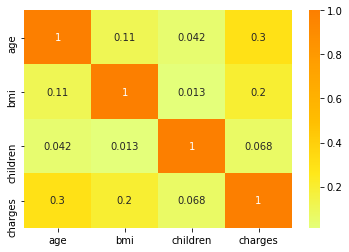

In [7]:
### view basic feature correlations in a heatmap ###
import seaborn as sns 
print('--- feature correlations heatmap ---')
sns.heatmap(df.corr() , cmap = 'Wistia' , annot = True)

--- scatter plots ---


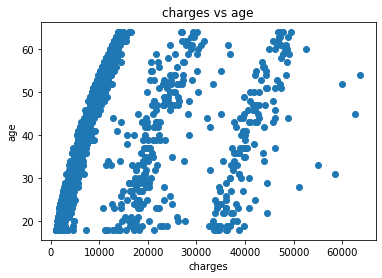

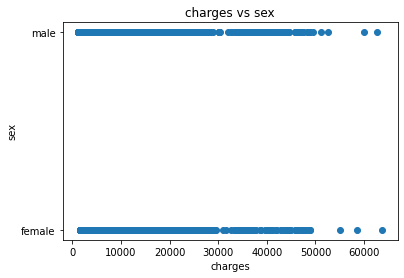

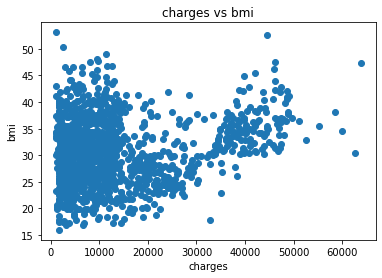

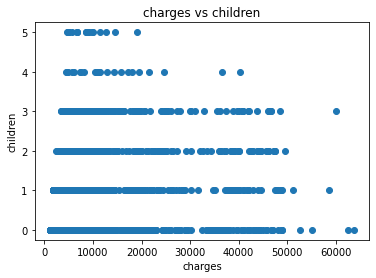

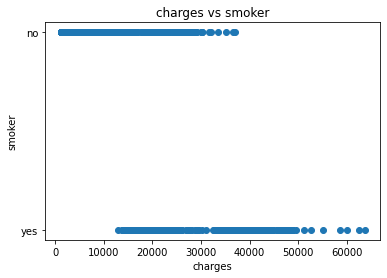

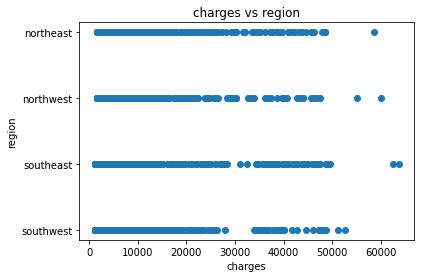

In [8]:
### view scatter plots for each feature vs. target ###
import matplotlib.pyplot as plt 
target_ = 'charges' # set the target
features_ = df.iloc[:, 0:6] # set the features
print('--- scatter plots ---')
for feature in features_:
    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df[target_], df[feature])
    ax.set_xlabel(target_)
    ax.set_ylabel(feature)
    ax.set_title(f'''{target_} vs {feature}''')
    plt.show()

#### Encode + Clean + Organize the Data


In [9]:
### use labelencoder on the data frame ###
# encoding for 'sex' & 'region'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # initiate the labelencoder
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].apply(le.fit_transform) # apply the encoder on the data 
print('data frame shape:', df.shape) # show the data frame shape 
df.head() # show the data frame 

data frame shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


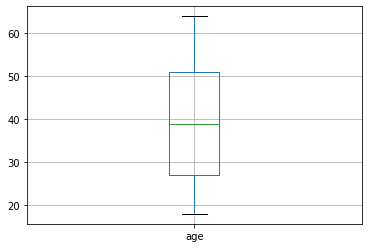

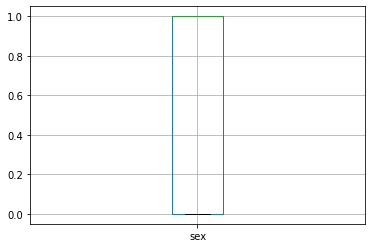

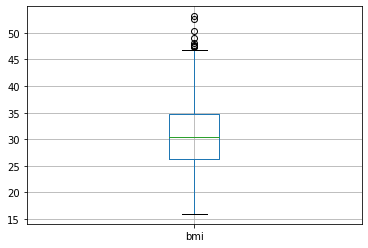

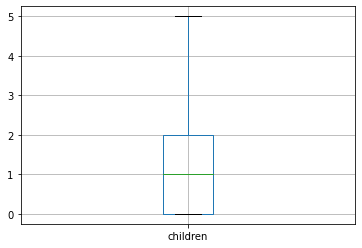

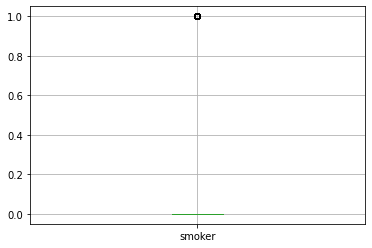

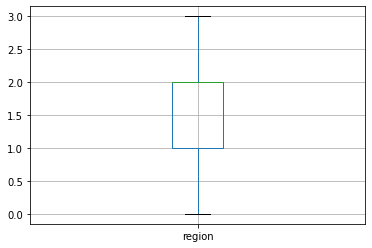

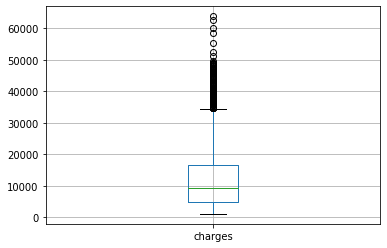

In [10]:
### check for outliers in the data ### 
import matplotlib.pyplot as plt
# view each feature in a boxplot 
for column in df:
    plt.figure() # plot figure 
    df.boxplot([column]) # set data

In [11]:
### function to find outliers in the data ###
def outlier_zscore(data):
    global outliers,zscore
    outliers = [] # list for outliers 
    zscore = [] # list for scores 
    threshold = 3.5 # set threshold 
    mean = np.mean(data) # mean 
    std = np.std(data) # standard deviaton
    for i in data:
        z_score = (i - mean)/std # calculate the z_score
        zscore.append(z_score) # append the score to the list
        if np.abs(z_score) > threshold: # if the score is greater than the threshold
            outliers.append(i) # append z_score the list 
    print(outliers) # show the outliers 
    return len(outliers), outliers

In [12]:
### run each feature 'wanted' through the function ### 
age_outliers_number, age_outliers = outlier_zscore(df.age)
sex_outliers_number, sex_outliers = outlier_zscore(df.sex)
bmi_outliers_number, bmi_outliers = outlier_zscore(df.bmi)
children_outliers_number, children_outliers = outlier_zscore(df.children)
smoker_outliers_number, smoker_outliers = outlier_zscore(df.smoker)
region_outliers_number, region_outliers = outlier_zscore(df.region)
charges_outliers_number, charges_outliers = outlier_zscore(df.charges)

[]
[]
[52.58, 53.13]
[]
[]
[]
[63770.42801, 58571.074479999996, 60021.39897, 62592.87309]


In [13]:
### removal of outliers per feature ###
for num, i in enumerate(df['bmi']): # removing the outliers of 'bmi' 
    if i in bmi_outliers:
        df['bmi'][num] = 48.5 # 3.5 under the lowest outlier
for num, i in enumerate(df['charges']): # removing the outliers of 'charges'
    if i in charges_outliers:
        df['charges'][num] = 55000.00000 # 3.5 under the lowest outlier

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


#### Single Linear Regression

In [14]:
### split the data into features & target sets ###
# for single regression select the 1 feature 
X = df.iloc[:, 0:1].values # set the features
y = df.iloc[:, 6].values # set the target 
print('X shape:', X.shape) # show the shape 
print('y shape:', y.shape) # show the shape 

X shape: (1338, 1)
y shape: (1338,)


In [15]:
### set the train test split parameters ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # split 80/20 train/test

In [16]:
### single linear regression model ###
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model1 = LinearRegression() # initiate the mdoel 
model1.fit(X_train, y_train) # fit the data on the model 
y_pred = model1.predict(X_test) # create the prediction from the poly data 
#### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ]) # create the predicitons data frame 
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"]) # create the real values  data frame
df_final = pd.concat([y_test_df , y_pred_df] , axis=1) # concat merge the data frames 
print('--- real values vs predicted values ---') # get the intercept
print(df_final.head())
### get the model metrics ###
print('--- model metrics ---') # get the intercept
print('intercept:', model1.intercept_) # get the intercept
print('coefficients:', model1.coef_) # get the coefficients
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score : {}".format(score)) # show the r2 score
print('model score:', model1.score(X_train, y_train)) # show the model score 
print("model accuracy: {}%".format(score * 100)) # show the model accuracy

--- real values vs predicted values ---
   Real_Values  Predicted_Values
0   9724.53000      16241.987393
1   8547.69130      15055.114571
2  45702.02235      15292.489135
3  12950.07120      18378.358474
4   9644.25250      16004.612829
--- model metrics ---
intercept: 3898.5100372143097
coefficients: [237.37456454]
r2 score : 0.12508625038717536
model score: 0.07909921415370014
model accuracy: 12.508625038717536%


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


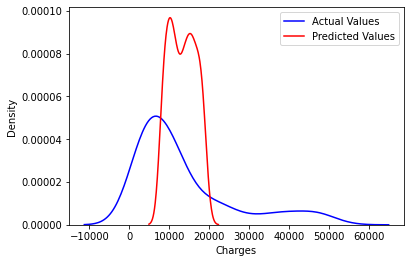

In [17]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()

#### Multi Linear Regression

In [18]:
### split the data into features & target sets ###
# for multi regression select all the features wanted
X = df.iloc[:, 0:6].values # set the features
y = df.iloc[:, 6].values # set the target 
print('X shape:', X.shape) # show the shape 
print('y shape:', y.shape) # show the shape 

X shape: (1338, 6)
y shape: (1338,)


In [19]:
### set the train test split parameters ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # split 80/20 train/test

In [20]:
### multi linear regression model ###
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model1 = LinearRegression() # initiate the mdoel 
model1.fit(X_train, y_train) # fit the data on the model 
y_pred = model1.predict(X_test) # create the prediction from the poly data 
#### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ]) # create the predicitons data frame 
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"]) # create the real values  data frame
df_final = pd.concat([y_test_df , y_pred_df] , axis=1) # concat merge the data frames 
print('--- real values vs predicted values ---') # get the intercept
print(df_final.head())
### get the model metrics ###
print('--- model metrics ---') # get the intercept
print('intercept:', model1.intercept_) # get the intercept
print('coefficients:', model1.coef_) # get the coefficients
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score : {}".format(score)) # show the r2 score
print('model score:', model1.score(X_train, y_train)) # show the model score 
print("model accuracy: {}%".format(score * 100)) # show the model accuracy

--- real values vs predicted values ---
   Real_Values  Predicted_Values
0   9724.53000      11013.367321
1   8547.69130       9780.829372
2  45702.02235      37847.999767
3  12950.07120      16068.361818
4   9644.25250       6948.154879
--- model metrics ---
intercept: -11521.739974797325
coefficients: [ 2.52719229e+02 -1.50675034e+01  3.25040932e+02  4.49862728e+02
  2.34550480e+04 -2.85774668e+02]
r2 score : 0.7994364086227608
model score: 0.7401587155026317
model accuracy: 79.94364086227608%


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


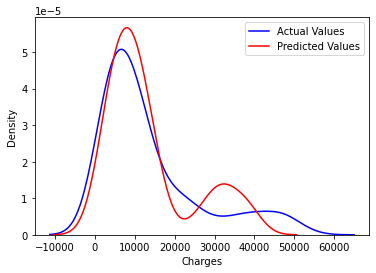

In [21]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()

#### Polynomial Linear Regression

In [22]:
### split the data into features & target sets ###
X = df.iloc[:, 0:6].values # set the features
y = df.iloc[:, 6].values # set the target 
print('X shape:', X.shape) # show the shape 
print('y shape:', y.shape) # show the shape 

X shape: (1338, 6)
y shape: (1338,)


In [23]:
### set the train test split parameters ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # split 80/20 train/test

In [24]:
### polynomial regression model ###
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
poly = PolynomialFeatures(degree = 4) # initiate the polynomial features, with degree = 4 
X_train_poly = poly.fit_transform(X_train) # fit transform the X train data wtih the poly model 
X_test_poly = poly.fit_transform(X_test) # fit transform the y train data wtih the poly model 
### linear regression model ###
model2 = LinearRegression() # initiate the mdoel 
model2.fit(X_train_poly, y_train) # fit the poly data on the model 
y_pred = model2.predict(X_test_poly) # create the prediction from the poly data 
### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ]) # create the predicitons data frame 
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"]) # create the real values  data frame
df_poly_final = pd.concat([y_test_df , y_pred_df] , axis=1) # concat merge the data frames 
print('--- real values vs predicted values ---') # get the intercept
print(df_poly_final.head())
### get the model metrics ###
print('--- model metrics ---') # get the intercept
print('intercept:', model2.intercept_) # get the intercept
print('coefficients:', model2.coef_) # get the coeffciients
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score : {}".format(score))  # show the r2 score
print('model score:', model2.score(X_train_poly, y_train)) # show the model score 
print("model accuracy: {}%".format(score * 100)) # show the model accuracy

--- real values vs predicted values ---
   Real_Values  Predicted_Values
0   9724.53000       9701.633102
1   8547.69130       8977.272858
2  45702.02235      48417.365356
3  12950.07120      13044.331970
4   9644.25250      10555.232544
--- model metrics ---
intercept: -58122146061.7351
coefficients: [ 5.81221970e+10  2.49188511e+03  6.51183296e+03 -7.51555670e+03
  1.03416335e+04  4.26356565e+04 -2.68180216e+03 -7.59518163e+01
 -4.11284192e+02 -7.18537680e+01 -2.61703877e+02 -3.23807507e+02
  2.04124714e+02  6.51183299e+03 -6.96079280e+02  1.44226526e+03
 -1.58841592e+03  1.14629564e+03  3.29313589e+02 -7.39629571e+02
 -5.90139488e+03  3.01291075e+02  2.51464907e+03 -2.85682870e+03
 -5.91384353e+02  4.26356565e+04  6.67313429e+03 -9.79059309e+02
  7.95660802e-01  2.43556539e+01  3.37882814e+00 -1.30492496e+01
 -8.98408555e+00 -2.48660381e+01 -4.11284192e+02 -1.40066132e+01
 -3.02810680e+01  4.77476592e+01  3.66056205e+01 -2.07483814e+00
  1.31056825e+01  5.68484329e+01  2.74797214e+0

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


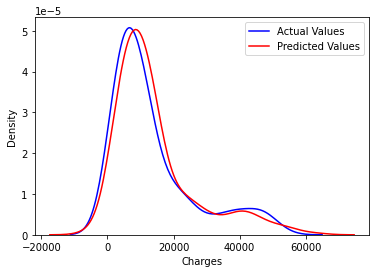

In [25]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()